In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 4.5))
for file in ["/work/gg0302/g260190/Dunkelflaute/Wind/EUR-11_MPI-M-MPI-ESM1-2-HR_historical_CLMcom-Hereon-CCLM-6-0-clm3_wind.nc","/work/gg0302/g260190/Dunkelflaute/Wind/EUR-11_MPI-M-MPI-ESM1-2-HR_ssp370_CLMcom-Hereon-CCLM-6-0-clm3_wind.nc"]:
# Open the dataset with Dask
    ds = xr.open_dataset(file, chunks={"time": 100})

    # Filter the dataset for years 1960 to 1990
    if "historical" in file:
        ds_filtered = ds.sel(time=slice("1960-01-01", "1989-12-31"))
        label="historical"
    else:
        ds_filtered = ds.sel(time=slice("2070-01-01", "2099-12-31"))
        label="future"

    # Extract the wind data as a Dask array
    wind = ds_filtered["sfcWind"].data

    # Define histogram bins
    bins = np.linspace(0, 30, 101)

    # Compute histogram lazily, then compute the result
    counts, edges = da.histogram(wind, bins=bins)
    counts, edges = da.compute(counts, edges)
    print(sum(counts))
    plt.stairs(counts, edges,label=label)

# Plot the histogram


plt.title("Dask Array Histogram of sfcWind")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 4.5))
for file in ["Wind/CEU-3_MIROC-MIROC6_historical_CLMcom-KIT-CCLM-6-0-clm2_wind.nc"]:
# Open the dataset with Dask
    ds = xr.open_dataset(file, chunks={"time": 100})

    # Extract the wind data as a Dask array
    wind = ds["sfcWind"].data

    # Define histogram bins
    bins = np.linspace(0, 30, 101)

    # Compute histogram lazily, then compute the result
    counts, edges = da.histogram(wind[~da.isnan(wind)], bins=bins)
    counts, edges = da.compute(counts, edges)
    print(sum(counts))
    plt.stairs(counts, edges,label="CEU-3")

# Plot the histogram


plt.title("Dask Array Histogram of sfcWind")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.show()


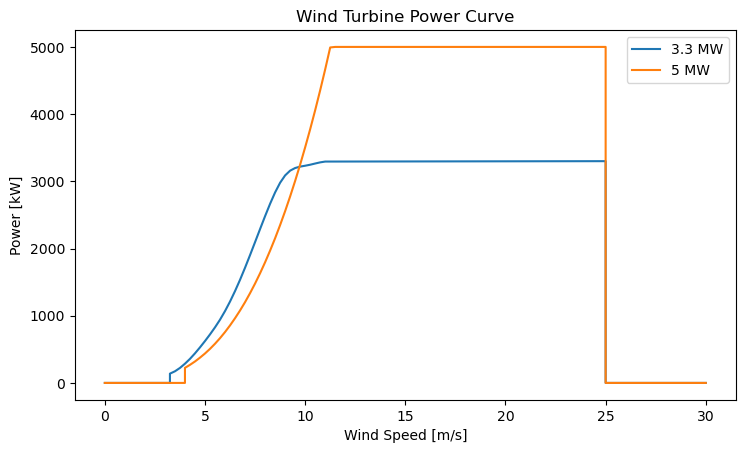

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
_WIND_3_3 = np.array(
    [   0,
        3.25,
        3.25,
        3.5,
        3.75,
        4.0,
        4.25,
        4.5,
        4.75,
        5.0,
        5.25,
        5.5,
        5.75,
        6.0,
        6.25,
        6.5,
        6.75,
        7.0,
        7.25,
        7.5,
        7.75,
        8.0,
        8.25,
        8.5,
        8.75,
        9.0,
        9.25,
        9.5,
        9.75,
        10.0,
        10.25,
        10.5,
        10.75,
        11.0,
        25,
        25,
        30,
    ],
    dtype=np.float32,
)

_POWER_3_3 = (
    np.array(
        [0,
         0,
            138,
            173,
            223,
            286,
            358,
            440,
            529,
            623,
            722,
            827,
            941,
            1069,
            1211,
            1367,
            1535,
            1715,
            1903,
            2096,
            2290,
            2482,
            2666,
            2835,
            2979,
            3088,
            3159,
            3198,
            3219,
            3232,
            3247,
            3265,
            3282,
            3294,
            3300,
            0,
            0
        ],
        dtype=np.float32,
    )
)

_WIND_5 = np.array(
    [   0,
        4,
        4,
        4.25,
        4.5,
        4.75,
        5,
        5.25,
        5.5,
        5.75,
        6,
        6.25,
        6.5,
        6.75,
        7,
        7.25,
        7.5,
        7.75,
        8,
        8.25,
        8.5,
        8.75,
        9,
        9.25,
        9.5,
        9.75,
        10,
        10.25,
        10.5,
        10.75,
        11,
        11.25,
        11.5,
        25,
        25,
        30
    ],
    dtype=np.float32,
)

_POWER_5 = (
    np.array(
        [
            0,
            0,
            224,
            269,
            319,
            376,
            438,
            507,
            583,
            666,
            757,
            856,
            963,
            1078,
            1202,
            1336,
            1479,
            1632,
            1795,
            1969,
            2153,
            2349,
            2556,
            2775,
            3006,
            3249,
            3506,
            3775,
            4058,
            4355,
            4666,
            4992,
            5000,
            5000,
            0,
            0
        ],
        dtype=np.float32,
    )
)
fig, ax = plt.subplots(figsize=(8.53, 4.8)) 
#ax.plot(df["Wind Speed [m/s]"],df["Power [kW]"],label="5MW")
ax.plot(_WIND_3_3,_POWER_3_3,label="3.3 MW")
ax.plot(_WIND_5,_POWER_5,label="5 MW")
ax.set_xlabel("Wind Speed [m/s]")
ax.set_ylabel("Power [kW]")
ax.set_title("Wind Turbine Power Curve")
plt.legend()
plt.savefig("wind_turbine_power_curve.pdf", bbox_inches="tight", format="pdf", dpi=300)
plt.show()